# Lesson outline
Here's an overview of what you'll learn to do in this lesson.  
Documentation links are for reference.

**Read in multiple stocks:**
* Create an empty [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) with dates as index: pandas.[date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)
* Drop missing date rows: [pandas.DataFrame.dropna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
* Incrementally join data for each stock: [pandas.DataFrame.join](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)

**Manipulate stock data:**
* [Index and select data](http://pandas.pydata.org/pandas-docs/stable/indexing.html) by row (dates) and column (symbols)
* Plot multiple stocks at once (still using [pandas.DataFrame.plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html))
* Carry out arithmetic operations across stocks

---
![problem_to_solve](img/dataframe.png)

## Building a dataframe
---

![joining](img/2.png)

In [78]:
# building a dataframe

import pandas as pd

start_date='2003-09-10'
end_date='2003-09-17'
dates=pd.date_range(start_date,end_date)
dates

DatetimeIndex(['2003-09-10', '2003-09-11', '2003-09-12', '2003-09-13',
               '2003-09-14', '2003-09-15', '2003-09-16', '2003-09-17'],
              dtype='datetime64[ns]', freq='D')

In [79]:
df1=pd.DataFrame(index=dates)
df1

""
2003-09-10
2003-09-11
2003-09-12
2003-09-13
2003-09-14
2003-09-15
2003-09-16
2003-09-17


In [80]:
# Join the two dataframes using DataFrame.join()

from matplotlib import cbook as cbook
msft_data = cbook.get_sample_data('msft.csv', asfileobj=False)
dfMSFT = pd.read_csv(msft_data, index_col="Date", parse_dates=True, usecols=['Date', 'Adj. Close*'], na_values=['nan'])

df = df1.join(dfMSFT)
df

,Adj. Close*
2003-09-10,27.40
2003-09-11,27.68
2003-09-12,28.18
2003-09-13,NaN
2003-09-14,NaN
2003-09-15,28.20
2003-09-16,28.74
2003-09-17,28.34


In [81]:
# Drop NaN Values

df.dropna()

,Adj. Close*
2003-09-10,27.40
2003-09-11,27.68
2003-09-12,28.18
2003-09-15,28.20
2003-09-16,28.74
2003-09-17,28.34


In [82]:
# Or, inner join results in the same effect

df = df1.join(dfMSFT, how='inner')
df

,Adj. Close*
2003-09-10,27.40
2003-09-11,27.68
2003-09-12,28.18
2003-09-15,28.20
2003-09-16,28.74
2003-09-17,28.34


In [83]:
# Rename column name

df = df.rename(columns={'Adj. Close*': 'MSFT'})
df

,MSFT
2003-09-10,27.40
2003-09-11,27.68
2003-09-12,28.18
2003-09-15,28.20
2003-09-16,28.74
2003-09-17,28.34


## Otaining a slice of data
---

![3](img/3.png)



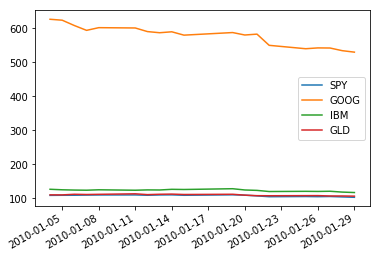

In [84]:
# problems with plotting multiple stocks

import util
import matplotlib.pyplot as plt

dates = pd.date_range('2010-01-01', '2010-01-31')
symbols = ['SPY', 'GOOG', 'IBM', 'GLD']
df = util.get_data(symbols, dates)
df.plot()
plt.show()

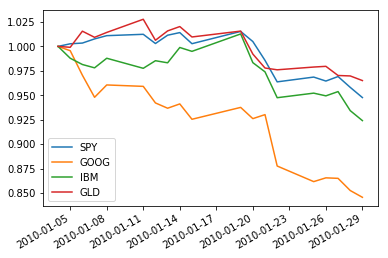

In [85]:
# normalize values

df = df/df.iloc[0]
df.plot()
plt.show()